<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

#2. 한글패치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
plt.rc('font', family='NanumBarunGothic')

#3. Load Data

In [ ]:
import pandas as pd


In [ ]:
file = '/gdrive/My Drive/data/data_2020.csv'
data = pd.read_csv(file)

#4. HeatMap 
집계일자

In [ ]:
#6시부터 22시까지의 데이터
data_6_22 = data[data['집계시'].isin(range(6,23))]

In [ ]:
#데이터의 재구조화 unstack()
#null 값에 0을 대입하는 fillna(0)
data_6_22_day = data_6_22.groupby('집계일자')['도착영업소코드'].value_counts().unstack().fillna(0)
data_6_22_day

도착영업소코드,105,110,115,120,125,130,135,140
집계일자,,,,,,,,
20200101,96.0,65.0,51.0,15.0,17.0,18.0,19.0,19.0
20200102,102.0,93.0,52.0,15.0,15.0,18.0,22.0,15.0
20200103,98.0,85.0,64.0,16.0,15.0,23.0,17.0,26.0
20200104,90.0,76.0,52.0,15.0,14.0,15.0,25.0,17.0
20200105,77.0,60.0,49.0,14.0,26.0,22.0,14.0,18.0
...,...,...,...,...,...,...,...,...
20200327,100.0,83.0,51.0,13.0,18.0,14.0,15.0,16.0
20200328,96.0,68.0,52.0,18.0,10.0,21.0,17.0,17.0
20200329,93.0,68.0,50.0,17.0,16.0,21.0,16.0,17.0


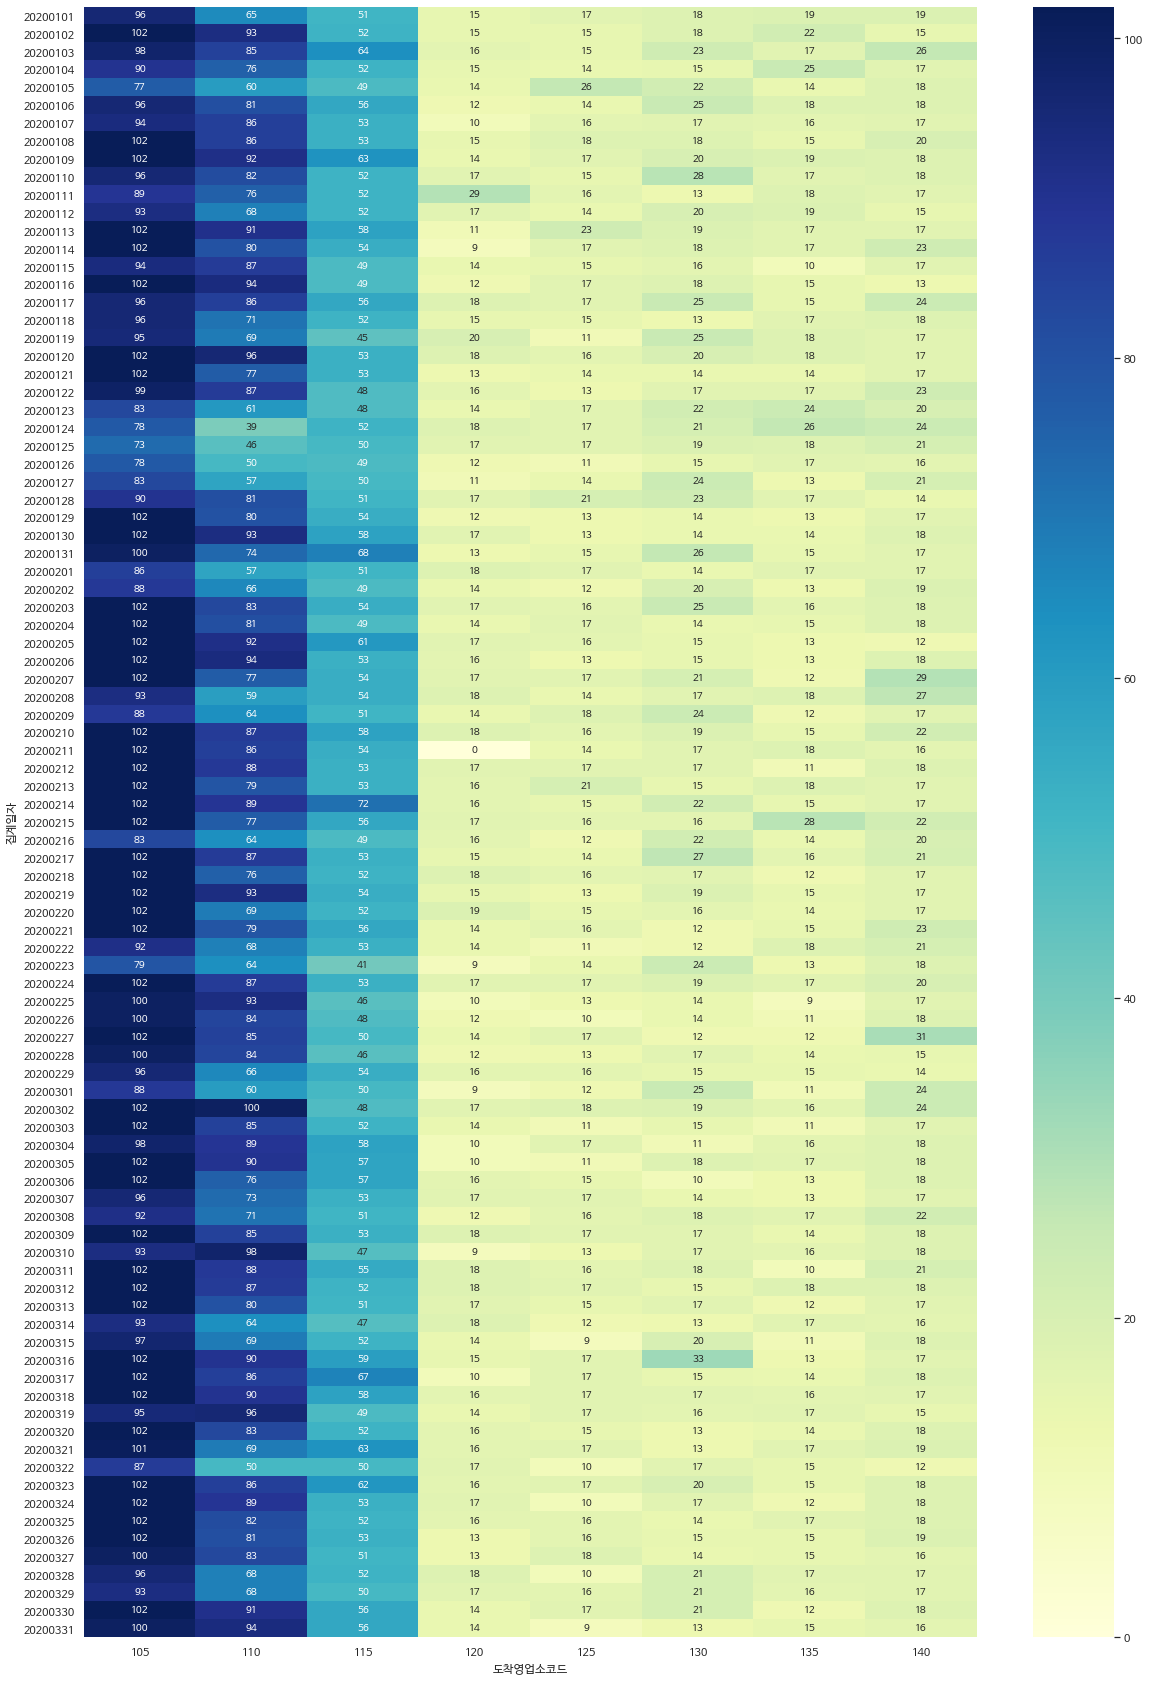

In [ ]:
f, ax = plt.subplots(figsize=(20,30))
sns.heatmap(data_6_22_day,annot=True, fmt =".0f",cmap = "YlGnBu" )

집계시

In [ ]:
data_6_22_time = data_6_22.groupby('집계시')['도착영업소코드'].value_counts().unstack()
data_6_22_time

도착영업소코드,105,110,115,120,125,130,135,140
집계시,,,,,,,,
6,532,403,250,42,42,46,45,80
7,532,443,306,65,56,55,46,82
8,532,474,284,78,65,82,60,87
9,528,466,283,91,77,94,75,89
10,529,458,292,94,79,99,81,93
11,529,460,289,93,85,108,86,94
12,526,460,292,94,87,108,91,100
13,525,448,288,96,93,113,91,100
14,523,454,290,96,95,113,94,101


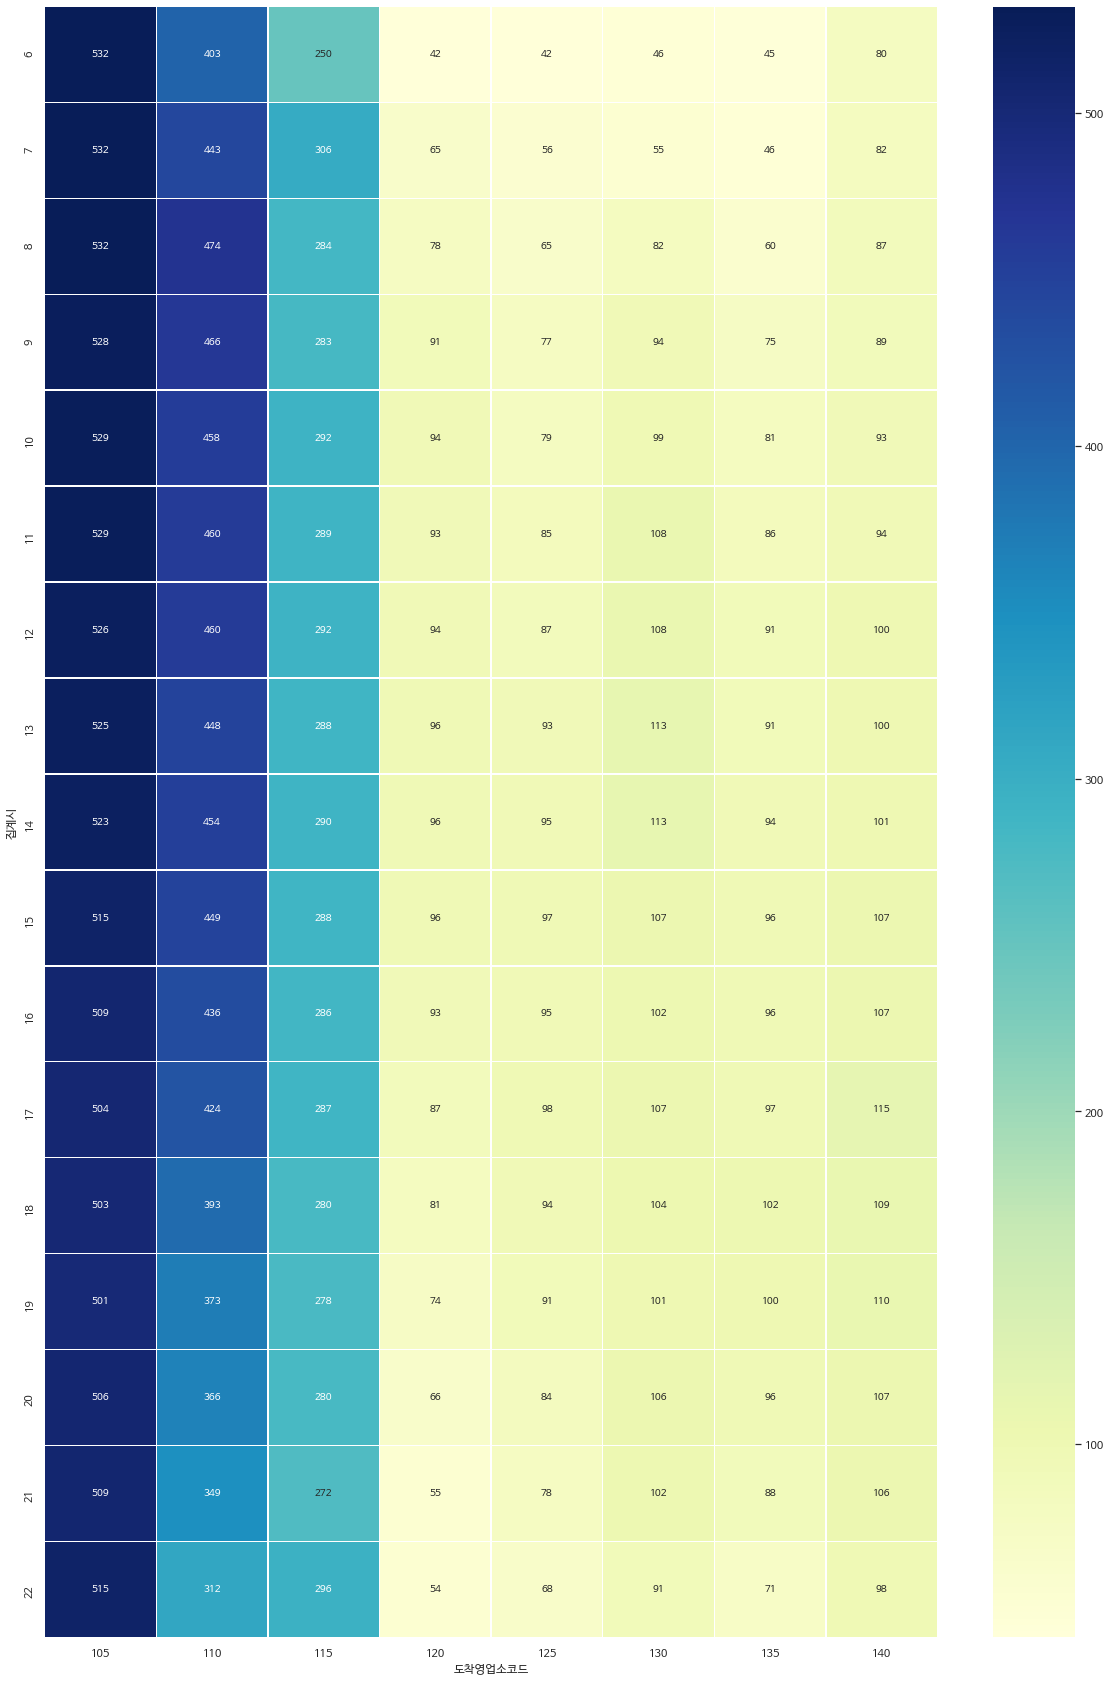

In [ ]:
f, ax = plt.subplots(figsize=(20,30))
sns.heatmap(data_6_22_time, annot=True, fmt=".0f", linewidth=.5 , cmap="YlGnBu")

요일

In [ ]:
data_6_22_week = data_6_22.groupby('요일')['도착영업소코드'].value_counts().unstack()

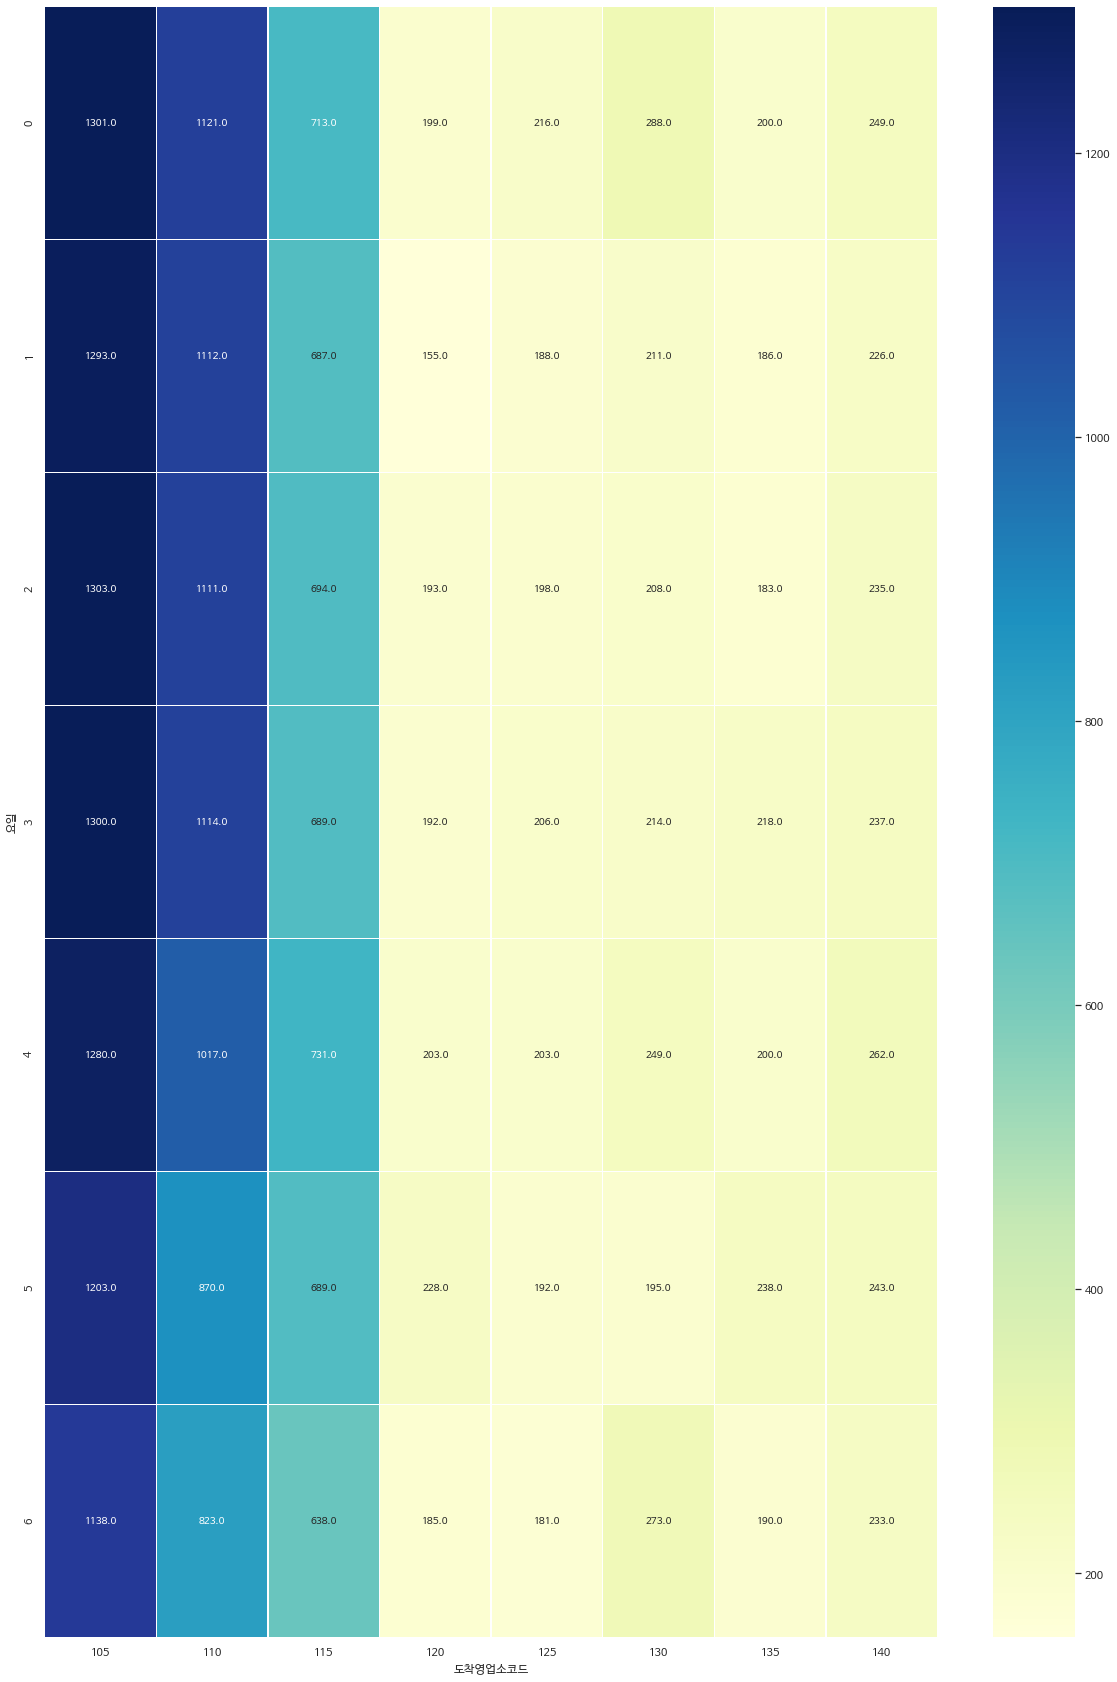

In [ ]:
f,ax = plt.subplots(figsize=(20,30))
sns.heatmap(data_6_22_week, linewidth=.5, annot=True, fmt=".1f", cmap = "YlGnBu")